# Import necessary libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

# Load the dataset

In [2]:
df = pd.read_csv('/kaggle/input/bank-customer-churn-data/churn_prediction.csv')
df.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,current_balance,...,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,last_transaction
0,1,2101,66,Male,0.0,self_employed,187.0,2,755,1458.71,...,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0,2019-05-21
1,2,2348,35,Male,0.0,self_employed,NaN,2,3214,5390.37,...,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0,2019-11-01
2,4,2194,31,Male,0.0,salaried,146.0,2,41,3913.16,...,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0,NaT
3,5,2329,90,NaN,NaN,self_employed,1020.0,2,582,2291.91,...,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1,2019-08-06
4,6,1579,42,Male,2.0,self_employed,1494.0,3,388,927.72,...,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1,2019-11-03


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28382 entries, 0 to 28381
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   customer_id                     28382 non-null  int64  
 1   vintage                         28382 non-null  int64  
 2   age                             28382 non-null  int64  
 3   gender                          27857 non-null  object 
 4   dependents                      25919 non-null  float64
 5   occupation                      28302 non-null  object 
 6   city                            27579 non-null  float64
 7   customer_nw_category            28382 non-null  int64  
 8   branch_code                     28382 non-null  int64  
 9   current_balance                 28382 non-null  float64
 10  previous_month_end_balance      28382 non-null  float64
 11  average_monthly_balance_prevQ   28382 non-null  float64
 12  average_monthly_balance_prevQ2  

In [4]:
df.shape

(28382, 21)

In [5]:
df.isna().sum()

customer_id                          0
vintage                              0
age                                  0
gender                             525
dependents                        2463
occupation                          80
city                               803
customer_nw_category                 0
branch_code                          0
current_balance                      0
previous_month_end_balance           0
average_monthly_balance_prevQ        0
average_monthly_balance_prevQ2       0
current_month_credit                 0
previous_month_credit                0
current_month_debit                  0
previous_month_debit                 0
current_month_balance                0
previous_month_balance               0
churn                                0
last_transaction                     0
dtype: int64

In [6]:
df.dropna(inplace=True)
df.shape

(24832, 21)

In [7]:
df.drop(columns='last_transaction', inplace=True)
df.shape

(24832, 20)

# Separate features and target variable

In [8]:
X = df.drop('churn', axis=1)
y = df['churn']

 # Data Preprocessing

In [9]:
# Identify categorical columns
categorical_columns = X.select_dtypes(include=['object']).columns.tolist()


In [10]:
# Create transformers for numerical and categorical features
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop='first', sparse=False)

In [11]:
# Combine transformers into a preprocessor using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, X.select_dtypes(exclude=['object']).columns),
        ('cat', categorical_transformer, categorical_columns)])

# Split the data into training and testing sets

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# Fit and transform the data using the preprocessor
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

# LR Model

In [14]:
# Train the logistic regression model
lr_model = LogisticRegression()
lr_model.fit(X_train_preprocessed, y_train)

LogisticRegression()

In [15]:
# Make predictions on the test set
lr_y_pred = lr_model.predict(X_test_preprocessed)

# RF Model

In [16]:
# Train the random forest model
rf_model = RandomForestClassifier()
rf_model.fit(X_train_preprocessed, y_train)

RandomForestClassifier()

In [17]:
# Make predictions on the test set
rf_y_pred = rf_model.predict(X_test_preprocessed)

# GBoosting Model

In [18]:
# Train the gradient boosting model
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train_preprocessed, y_train)

GradientBoostingClassifier()

In [19]:
# Make predictions on the test set
gb_y_pred = gb_model.predict(X_test_preprocessed)

# Evaluate models

In [20]:
def evaluate_model(model, y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    conf_matrix = confusion_matrix(y_true, y_pred)
    class_report = classification_report(y_true, y_pred)
    
    print(f"Model: {model.__class__.__name__}")
    print(f"Accuracy: {accuracy}")
    print("Confusion Matrix:")
    #print(conf_matrix)
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
    disp.plot(cmap='Blues')
    plt.show()
    print("Classification Report:")
    print(class_report)
    print("\n")

Model: LogisticRegression
Accuracy: 0.8413529293336017
Confusion Matrix:


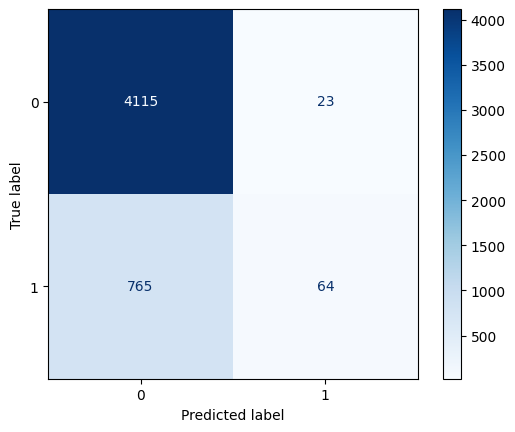

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.99      0.91      4138
           1       0.74      0.08      0.14       829

    accuracy                           0.84      4967
   macro avg       0.79      0.54      0.53      4967
weighted avg       0.83      0.84      0.78      4967





In [21]:
# Evaluate Logistic Regression model
evaluate_model(lr_model, y_test, lr_y_pred)

Model: RandomForestClassifier
Accuracy: 0.8749748339037648
Confusion Matrix:


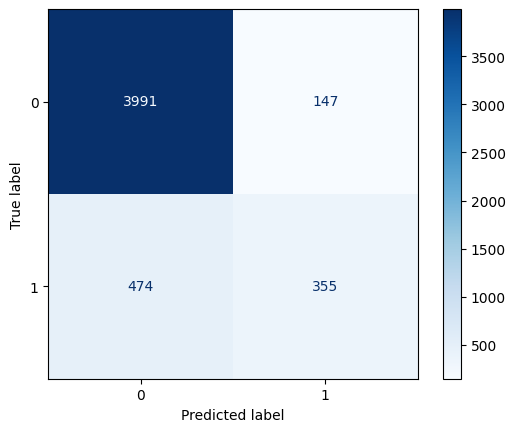

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.96      0.93      4138
           1       0.71      0.43      0.53       829

    accuracy                           0.87      4967
   macro avg       0.80      0.70      0.73      4967
weighted avg       0.86      0.87      0.86      4967





In [22]:
# Evaluate Random Forest model
evaluate_model(rf_model, y_test, rf_y_pred)

Model: GradientBoostingClassifier
Accuracy: 0.8749748339037648
Confusion Matrix:


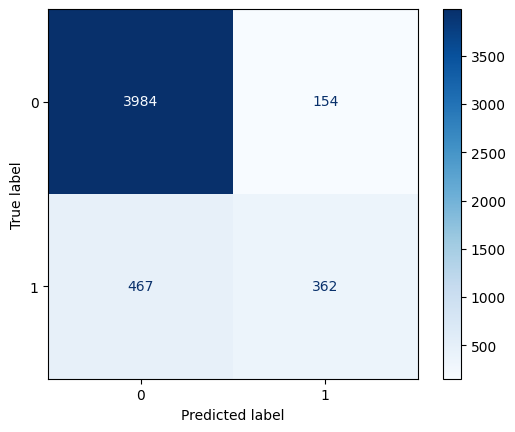

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.96      0.93      4138
           1       0.70      0.44      0.54       829

    accuracy                           0.87      4967
   macro avg       0.80      0.70      0.73      4967
weighted avg       0.86      0.87      0.86      4967





In [23]:
# Evaluate Gradient Boosting model
evaluate_model(gb_model, y_test, gb_y_pred)